# Comprehensive Data Exploration With Python

In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. 데이터 로드 및 확인

In [2]:
# 데이터 로드
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
# column 확인
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 2.1 'SalePrice' 분석

In [4]:
# descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

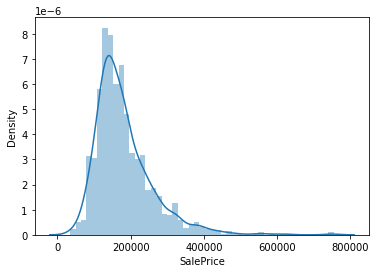

In [5]:
# histogram
sns.distplot(df_train['SalePrice'])

* 그래프가 왼쪽으로 약간 치우쳐있음

In [6]:
# skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


* skewness: 통계 집단의 도수분포에서 평균값에 관한 비대칭의 방향과 그 정도를 나타내는 특성값
* kurtosis: 도수분포의 뾰족한 정도

#### Relationship with numerical variables

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

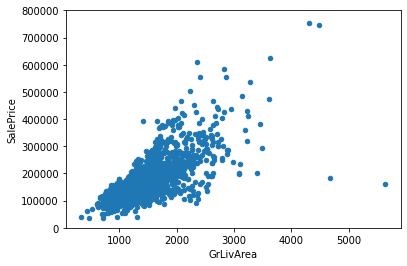

In [7]:
# scatter plot(saleprice & grlivarea)
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

* GrLivArea와 SalePrice데이터의 관계를 scatter plot을 통해 그려보았다.
* 두 데이터는 선형 관계를 보임

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

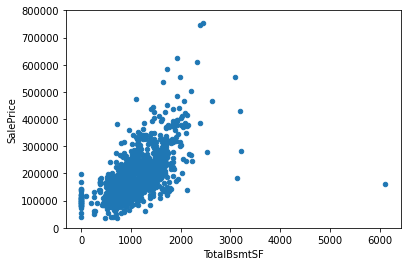

In [8]:
# scatter plot(saleprice & TotalBsmtSF)
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

* 다음으로 TotalBsmtSF와 SalePrice의 scatter plot을 그려보았다.
* 이 둘 역시 선형관계를 보여준다.

#### Relationship with categorical features

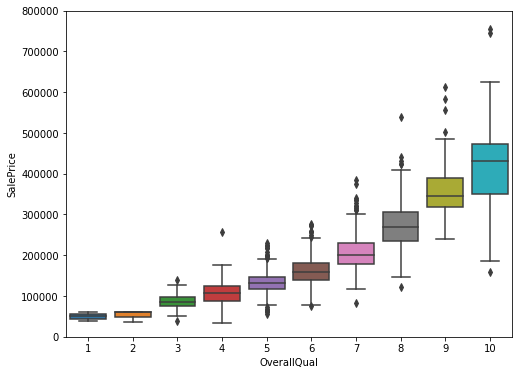

In [9]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

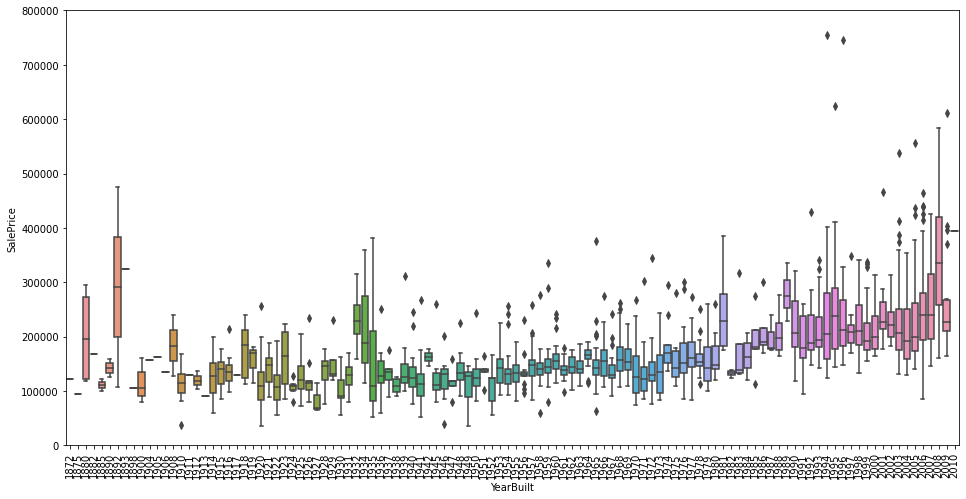

In [10]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

* 신축 건물에 더 높은 가격이 책정된 것을 볼 수 있음

## 요약
TotalBsmtSF, GrLivArea 두 가지 변수는 SalePrice와 선형 관계를 보여주고, TotalBsmtSF는 높은 기울기를 갖는다는 사실을 확인하였다.
boxplot을 활용하여 YearBuilt와 overallqual 두 변수와의 관계도 시각화 해 보았으나 overallqual과 SalePrice의 관계가 YearBuilt를 통한 분석보다 더 좋은 품질을 보여준다.

<AxesSubplot:>

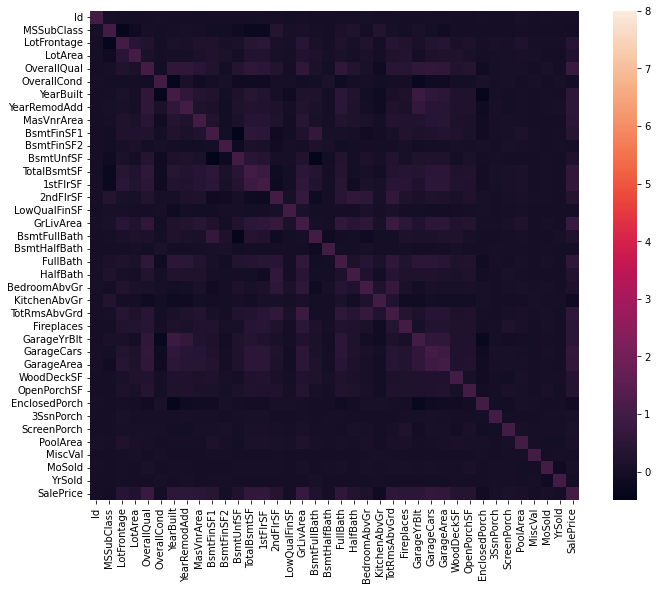

In [12]:
# correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 8, square = True)

* 히트맵 상에서 눈에 보이는 두 가지 사각형을 살펴보자
* 첫 사각형은 TotalBsmtSF와 1stFlrsF간의 사각형이며, 두 번째는 GarageX간의 사각형이다.

## 'SalePrice' correlation matrix

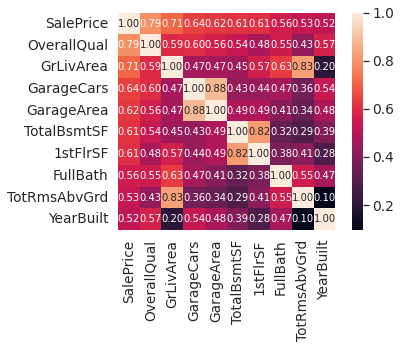

In [13]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* 'OverallQual', 'GrLivArea' 및 'TotalBsmtSF'는 'SalePrice'와 높은 상관 관계를 보인다.
* 'GarageCars'는 차고에 들어갈 수 있는 자동차의 수는 차고 면적의 결과로 'Garage Area'와의 연관성이 높다.
* 위 두 Garage'X' 변수중 한 가지 만을 사용할 것임.
* 'TotalBsmtSF'와 '1stFloor'도 위 두 Garage 변수와 비슷한 관계를 보임.